## Learning Objectives

Today we will be going over just a touch of unsupervised learning, not from a theoretical perspective but from a practical one. 

How do columns relate to each other?

We will be asking ourselves how to visualize high dimensional data and will be using PCA in order to do so.

Uses
    - Prep for some other supervised learning
    - visualizations (reduce dimensionality)
    - academia

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_data = load_iris()

# we make our test set
X_train, X_test, y_train, y_test = train_test_split(iris_data['data'], iris_data['target'], test_size=0.2, random_state=1)

# and we make our validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [2]:
import numpy as np
import pandas as pd

full_data = np.append(X_train, y_train.reshape(-1, 1), axis=-1)

full_df = pd.DataFrame(data=full_data, columns=np.append(iris_data['feature_names'], 'target'))

In a supervised learning problem we are interested in learning what a specific of our feature will be on new data points. In unsupervised learning we are interested in emergent facts about our data. Today we will ask ourselves one question. That being said there are many different techniques and this is only the smallest part of unsupervised learning. Here is the question:

1. Is there an easy way to visualize our dataset when we have multiple quantitative dims


## PCA: Dimensionality Reduction

Takes pairplots and reduces it to two dimensions

The way that we previously visualized the quantitative variables in the billionaires dataset was using the pairplot, we can look at it bellow:

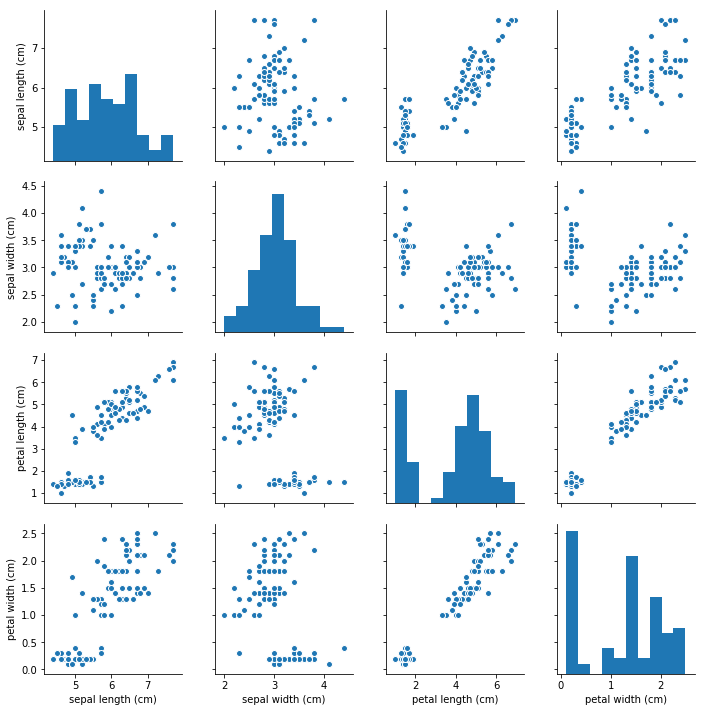

In [3]:
%matplotlib inline

import seaborn as sns

sns.pairplot(full_df, vars=iris_data['feature_names'])

In such a way we could see all the quantitative variables in one plot. But this is somewhat hard to see how the flowers clump up, or distinctive features between them all. Or if we wanted to plot a qualitative variable on top and see if it affects the various quanities, it is often hard, eg.:

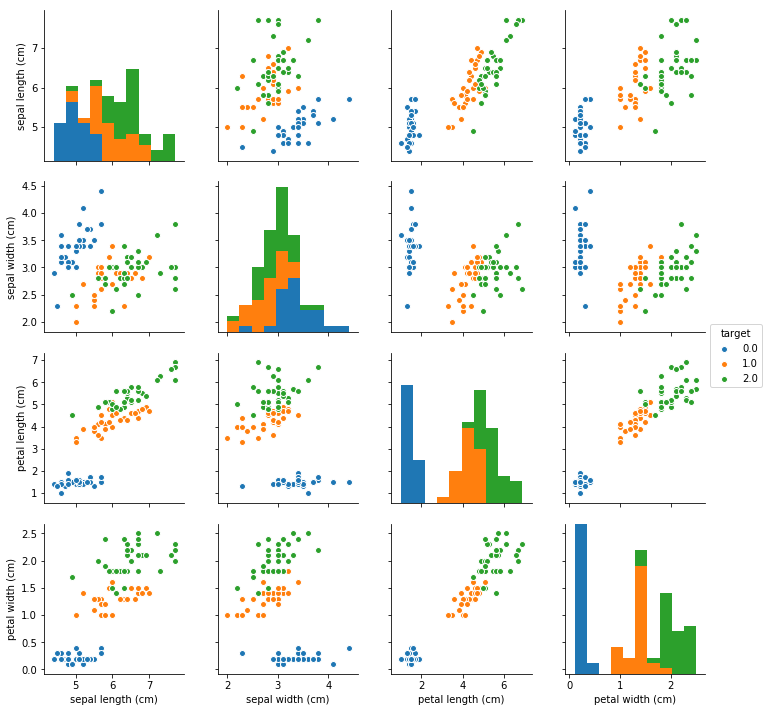

In [4]:
sns.pairplot(full_df, hue='target', vars=iris_data['feature_names'])

For me it is hard to see global patterns, though local patterns stand out. Now the real problem is when the dim gets larger than 5, it is nearly impossible to separate them out. This is where dimensionality reduction techniques like PCA come into play.

PCA will reduce the dimension of your dataset to whatever you want and will tell you the tradeoff associated. Let's use PCA below and interpret the results:

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# we choose two components so that we can visualize this in 2D
pca = PCA(2)

# normalize the data before we transform it. This tends to be very important for most ML applications
X = scale(X_train)
transformed_data = pca.fit_transform(X)

transformed_data.shape

(96, 2)

In [8]:
print (iris_data['feature_names'])
print (pca.components_) #weighted average of all the other columns
print (pca.explained_variance_ratio_) #First column, can explain .72 of the variance; we may only lose 28% of data if we decompress

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[ 0.52928386 -0.2385349   0.58415298  0.56720807]
 [ 0.33683735  0.9392027   0.01537152  0.06482759]]
[0.72087061 0.2347434 ]


PCA attempts to explain the variance in your data. If your numeric columns are highly related (like age and income) then perhaps you only need one number to represent them both. I printed out two things, the components in PCA and the explained variance. The components represent linear combinations of the original columns.

The second thing I printed out is the explained variance ratio. The higher this is the more that the columns returned can explain the full data. In our case our two columns explain 95% of the var in our data.

Regardless we are already here, so let's plot the result:

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


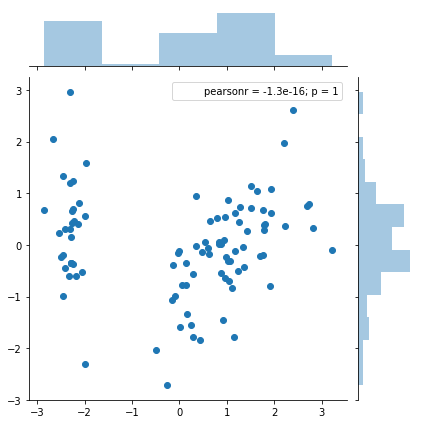

In [9]:
sns.jointplot(transformed_data[:, 0], transformed_data[:, 1])

Remember the dimensions no longer represent any concrete features, but rather an aggregation of a couple of features. We can see if these dimensions correspond to specific qualitative features as well:

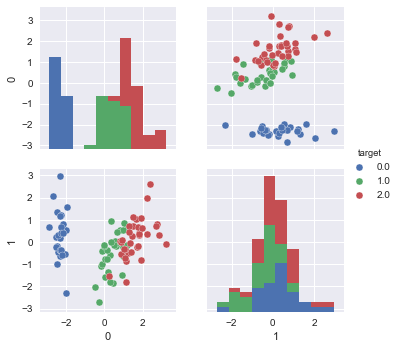

In [17]:
data = pd.DataFrame(transformed_data).join(full_df[['target']])
sns.pairplot(data, 'target', vars=[0,1])

Sometimes we will see that the dimensions correspond to particular quantitative features, sometimes not. In addition we can even feed these transformed features into our learning algorithms. 

t-SNE is a type of clustering
KMeans is another type of clustering

## Learning Objectives

Today we will be going over just a touch of unsupervised learning, not from a theoretical perspective but from a practical one. 

We will be asking ourselves how to visualize high dimensional data and will be using PCA in order to do so.

## Comprehension Questions

1.	How do babies learn? Is it supervised or unsupervised?
2.	What is an emergent fact about data? Is there an inherent structure to data?
3.	What do you miss if you only use a pair plot to visualize higher dimensional data?
4.	Can PCA capture all the interactions in your data?
5.	Can we do PCA on qualitative features as well?
6.	When should you use unsupervised learning?
